# 06/12/20 - This notebook explores the estimation of velocity dispersion of candidates as a funciton of stellar mass, with a fit taken from Zihad(2016), where:
# ---
# $\sigma(M_*) = \sigma_b * (M_* / M_b)^{\alpha}$
#
## For z < 0.2: (SDSS fit)
### $\sigma = 10^{2.073} (M_*/ 10^{10.26} M_{\odot})^{\alpha}$
### where $\alpha = 0.403$ if $M_* <= 10^{10.26}$, or $\alpha = 0.293$ otherwise
## For z > 0.2: (SHELS fit)
### $\sigma = 10^{2.071} (M_* / 10^{10.26} M_{\odot})^{0.281}$

In [108]:
#libraries

%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import colors as colors
#import matplotlib.text as text
#import matplotlib.lines as lines
import numpy as np
#from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
#from astropy.io import fits
#import astropy.coordinates as coord
import astropy.units as u
#from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [109]:
# try this again???

# create velocity disperions estimator
def calculate_sigma (z, mass):
    mb = 10**(10.26)
    if z < 0.2: # SDSS fit
        sigma_b = 10**(2.073)
        if mass < mb:
            alpha = 0.403
        else:
            alpha = 0.293
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    elif (z >= 0.2) & (z < 0.7): # SHELS fit
        sigma_b = 10**(2.071)
        alpha = 0.281
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    else:
        print(f'Redshift out of range. {z}')
        sigma = 0
    return sigma
            

In [169]:
z1 = np.linspace(0.1, 0.65, 10)
mass1 = 10**(np.linspace(9.5, 12, 10))
z =[]
mass = []
def calculate_sigmas (z, mass):
    sigmas = []
    for i in range(len(z)):
        sigma = calculate_sigma(z[i], mass[i])
        sigmas.append(sigma)
    return sigmas
    #print(sigmas)

In [170]:
calculate_sigmas(z1, mass1)
#sigmas

[58.441317755738595,
 75.62483575513482,
 103.16944900287172,
 123.48285630320615,
 147.79584410084237,
 176.89590431763747,
 211.7255810183932,
 253.412999190093,
 303.308404443293,
 363.0278971479567]

In [164]:
calculate_sigma(0.3, 10**(10.5))

137.54347738119625

In [191]:
# load in data

spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')

In [192]:
spec['sigma'] = calculate_sigmas(z= spec.z_lens, mass = spec.STELLAR_MASS)
mac['sigma'] = calculate_sigmas(z = mac.Z, mass = mac.STELLAR_MASS)
zoo['sigma'] = calculate_sigmas(z = zoo.Z, mass = zoo.STELLAR_MASS)

Redshift out of range. 0.7215999960899353


In [197]:
print(spec.sigma.mean(),
      mac[mac.sigma > 0].sigma.mean(),
      zoo.sigma.mean())

160.95495785637405 236.54117815766205 172.69879274193764


In [196]:
mac.sigma

0     265.717604
1     259.648833
2       0.000000
3     250.962957
4     235.048435
5     263.772729
6     271.386687
7     207.321227
8     222.092727
9     231.634974
10    252.369551
11    204.536204
12    243.522847
13    229.186553
14    279.291311
15    276.440713
16    268.777693
17    239.144431
18    131.946582
19    179.814964
20    236.525638
21    214.797345
22    189.400102
23    275.803793
24    186.102433
25    224.567899
26    211.408846
27    244.205827
28    267.359316
29    215.922716
30    188.050452
31    206.677069
32    265.339511
33    274.872488
34    200.260846
35    262.704719
36    227.347571
37    196.967165
38    222.056856
39    235.389055
40    306.795305
41    257.190365
42    286.362571
43    281.268779
44    289.190486
45    174.261157
46    227.448867
Name: sigma, dtype: float64

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/pyth

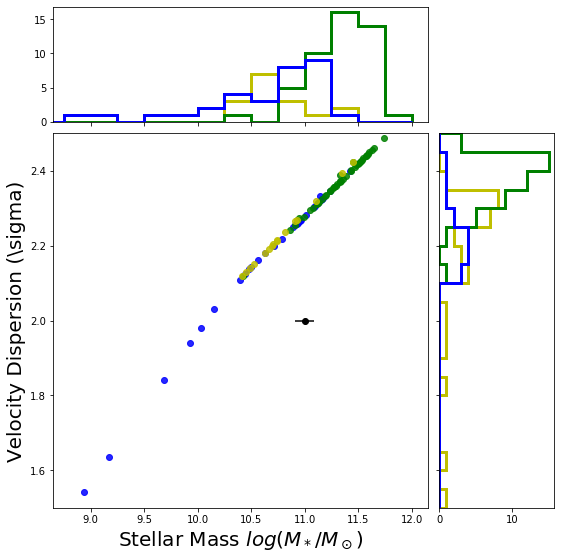

In [283]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim(8.65,12.15)
axScatter.set_ylim(1.5,2.5)
axScatter.plot(np.log10(spec.STELLAR_MASS), np.log10(spec.sigma), 
               'bo',label='GAMA Spectroscopy - 47 candidates', alpha = 0.85)
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), np.log10(mac.sigma), 
               'go',label='LinKS Machine Learning - 47 candidates', alpha = 0.85)
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), np.log10(zoo.sigma), 
               'yo',label='GalaxyZoo Citizen Science - 29 candidates', alpha = 0.85)
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

# plot two overlaps
G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(np.log10(G136604.STELLAR_MASS), G136604.sigma, 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
axScatter.plot(np.log10(G124486.STELLAR_MASS), G124486.sigma, 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
axScatter.errorbar(11.0, 2.0,  
                   xerr= 0.09,
                  fmt = 'o',
                   color = 'black',
                   solid_capstyle = 'round',
                  label = 'Stellar Mass Mean Error ~ 0.09 dex')

#axScatter.legend(loc='best', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(zoo.STELLAR_MASS)-0.5, max(zoo.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,1.5,2.5], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Velocity Dispersion (\sigma)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(np.log10(spec.sigma), orientation='horizontal', 
             range=[1.5,2.5], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(mac.sigma), orientation='horizontal', 
             range=[1.5,2.5], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(zoo.sigma), orientation='horizontal', 
             range=[1.5,2.5],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], 
             bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], 
             bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], 
             bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_overlaps_060920..pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/veldisp_stellar_mass.png')

In [221]:
np.log10(zoo.sigma.min())

2.1194308414873904

# Einstein Radius of Isothermal Sphere:
## $\theta_E = 4\pi\sigma^2 D_{SL} / (D_S c^2$)

In [265]:
spec['D_source'] = 0
spec['D_lens'] = 0
for i in range(len(spec)):
    if spec.D1[i] < spec.D2[i]:
        spec.D_source[i] = spec.D2[i]
        spec.D_lens[i] = spec.D1[i]
    else:
        spec.D_source[i] = spec.D1[i]
        spec.D_lens[i] = spec.D2[i]
    
spec['theta_e_veldisp'] = 206265 * 4 * np.pi * (spec.sigma)**2 * (spec.D_source - spec.D_lens) / (spec.D_source * c**2)
spec.theta_e_veldisp

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shawn/minicon

0     0.218652
1          NaN
2     0.250109
3     0.219634
4     0.306403
5          NaN
6     0.419019
7     0.247211
8     0.110471
9          NaN
10    0.227255
11    0.218140
12    0.144671
13         NaN
14    0.273981
15    0.229014
16    0.192943
17         NaN
18    0.251248
19    0.212063
20         NaN
21         NaN
22         NaN
23    0.024189
24         NaN
25    0.381471
26    0.750172
27    0.376155
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33    0.484068
34         NaN
35         NaN
36    0.362361
37    0.430439
38    0.256526
39    0.138860
40    0.219301
41    0.025995
42    0.344412
43    0.273347
44    0.113693
45    0.134028
46    0.345686
Name: theta_e_veldisp, dtype: float64

In [266]:
mac['theta_e_veldisp'] = 206265 * 4 * np.pi * (mac.sigma)**2 / c**2
mac.theta_e_veldisp

0     2.036267
1     1.944316
2     0.000000
3     1.816407
4     1.593341
5     2.006568
6     2.124081
7     1.239600
8     1.422534
9     1.547399
10    1.836826
11    1.206520
12    1.710304
13    1.514859
14    2.249618
15    2.203931
16    2.083437
17    1.649357
18    0.502100
19    0.932493
20    1.613431
21    1.330613
22    1.034557
23    2.193787
24    0.998845
25    1.454418
26    1.288963
27    1.719911
28    2.061506
29    1.344592
30    1.019865
31    1.231909
32    2.030476
33    2.178997
34    1.156608
35    1.990351
36    1.490646
37    1.118875
38    1.422075
39    1.597962
40    2.714510
41    1.907671
42    2.364975
43    2.281587
44    2.411915
45    0.875780
46    1.491975
Name: theta_e_veldisp, dtype: float64

In [267]:
zoo['theta_e_veldisp'] = 206265 * 4 * np.pi * (zoo.sigma)**2 / c**2
zoo.theta_e_veldisp

0     0.721945
1     0.769380
2     1.262593
3     0.664093
4     0.976812
5     0.998845
6     1.762487
7     0.550908
8     2.030476
9     0.499868
10    0.736580
11    0.699193
12    0.524477
13    0.576472
14    0.778163
15    0.853976
Name: theta_e_veldisp, dtype: float64

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


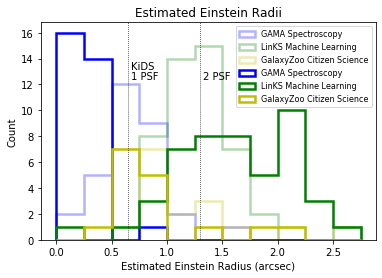

In [282]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Estimated Einstein Radii")

#plt.ylim(0,14.5)

plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)

plt.hist(spec.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
plt.hist(mac.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
plt.hist(zoo.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
#plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.fill_betweenx(x1=0.1, x2=0.2, y=(0,15),# Fill region for false candidates
 #                facecolor="purple", # The fill color
  #               color='purple',       # The outline color
   #              alpha=0.15, # Transparency of the fill
    #            label='NextGen Resolution')

plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 12.4, '1 PSF')
plt.text(0.675, 13.2, 'KiDS')
plt.text(1.325, 12.4, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_veldisp_061220.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_060920..pdf')


In [284]:
zoo[zoo.theta_e_veldisp < 0.65]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z,TOTAL_MASS,theta_e,theta_e_H0,theta_e_Ang,f_dm,theta_e_H0_slide,theta_e_Ang_slide,sigma,theta_e_veldisp
7,15,17,17,17,93310,219.92276,0.50731,0.575139,3.094000e+10,0.1377,7.933333e+10,0.759213,0.759213,0.754649,0.473768,0.653593,0.649663,138.210950,0.550908
9,17,19,19,19,600421,135.49058,0.28417,0.420189,2.621000e+10,0.0565,6.720513e+10,1.090887,1.090887,1.089838,0.464401,0.930877,0.929982,131.653025,0.499868
12,21,24,24,24,342699,216.90174,2.13250,0.457088,2.845000e+10,0.0876,7.294872e+10,0.912766,0.912766,0.910612,0.469031,0.782271,0.780425,134.854707,0.524477
13,22,25,25,25,363319,218.85395,2.56676,0.457532,3.343000e+10,0.0985,8.571795e+10,0.933084,0.933084,0.930280,0.478138,0.806631,0.804208,141.381296,0.576472


In [285]:
mac[mac.theta_e_veldisp < 0.65]

,Unnamed: 0,Unnamed: 0.1,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z,theta_e,theta_e_H0,theta_e_Ang,f_dm,theta_e_H0_slide,theta_e_Ang_slide,sigma,theta_e_veldisp
2,2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216,1.715374,1.715374,1.354724,0.659323,1.835354,1.449480,0.000000,0.0000
18,18,18,165409.0,3098.0,181.19672,-2.72009,38.0,2.641000e+10,0.0196,1.859202,1.859202,1.858993,0.464830,1.587132,1.586953,131.946582,0.5021


# NOTE! A LinKS candidate has theta-e = 0 because it is beyond the applicable redshift range. I should probably have just taken it anyway and made note of it. That is what I will do if I put this in the paper.